 # Projeto Segmentação de clientes de superlojas globais 

In [1]:
#pip install seaborn --user

In [2]:
# Imports

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15,6))
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<Figure size 1500x600 with 0 Axes>

In [3]:
# Versões dos pacotes usados neste jupyter notebook

%reload_ext watermark
%watermark -a "Carlos Rodrigues" --iversions

Author: Carlos Rodrigues

matplotlib: 3.8.2
pandas    : 2.1.3
seaborn   : 0.13.1
numpy     : 1.26.2



### Carregando e compreeendendo os dados

In [4]:
# Carregando o dataset

df_superstore = pd.read_excel('dados\Global Superstore 2018.xlsx')

In [5]:
# Shape

df_superstore.shape

(51290, 24)

In [6]:
# nomes das colunas
df_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
# tipo das variáveis
df_superstore.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Product Name              object
Sub-Category              object
Category                  object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [8]:
df_superstore.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium
5,28879,ID-2015-AJ107801-42113,2015-04-19,2015-04-22,First Class,AJ-107801,Anthony Jacobs,Corporate,NaN,Kabul,...,FUR-TA-3420,"Bevis Conference Table, Fully Assembled",Tables,Furniture,4626.15,5,0.0,647.55,835.57,High
6,27993,IN-2017-GM144551-42948,2017-08-01,2017-08-05,Standard Class,GM-144551,Gary Mitchum,Home Office,NaN,Kabul,...,FUR-BO-3626,"Bush Classic Bookcase, Pine",Bookcases,Furniture,2070.15,5,0.0,848.70,185.01,Medium
7,28967,IN-2017-VB217451-43080,2017-12-11,2017-12-15,Standard Class,VB-217451,Victoria Brennan,Corporate,NaN,Kabul,...,FUR-CH-4683,"Hon Rocking Chair, Red",Chairs,Furniture,914.34,7,0.0,356.58,106.41,High
8,29492,IN-2016-LO171701-42637,2016-09-24,2016-09-28,Standard Class,LO-171701,Lori Olson,Corporate,NaN,Kabul,...,TEC-PH-5814,"Samsung Audio Dock, VoIP",Phones,Technology,1168.44,7,0.0,443.94,92.34,Medium
9,28966,IN-2017-VB217451-43080,2017-12-11,2017-12-15,Standard Class,VB-217451,Victoria Brennan,Corporate,NaN,Kabul,...,TEC-PH-3129,"Apple Audio Dock, VoIP",Phones,Technology,500.94,3,0.0,115.20,79.59,High


### Dicionário de dados

#### Row ID       -  ID da linha  	   
#### Order ID     -	ID do pedido
#### Order Date   -	Data do pedido
#### Ship Date    -	Data de envio
#### Ship Mode    - 	Modo de envio
#### Customer ID	 -  Identificação do Cliente
#### Customer Name - nome do cliente
#### Segment       - Segmento
#### Postal Code	  - Código postal
#### City          -	Cidade
#### Product ID	  - ID do produto
#### Product Name  -	Nome do Produto
#### Sub-Category  -	Subcategoria
#### Category      -	Categoria
#### Sales	      - Vendas
#### Quantity	  - Quantidade
#### Discount	  - Desconto
#### Profit	      - Lucro
#### Shipping Cost - Frete
#### Order Priority - Ordem Prioritária

In [9]:
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium


In [10]:
cat = df_superstore.select_dtypes(include=['object'])

In [11]:
cat

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Order Priority
0,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,Medium
1,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,Medium
2,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,Medium
3,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,Medium
4,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,ZA-2014-AS285147-41718,Standard Class,AS-285147,Alejandro Savely,Corporate,Harare,Harare,Zimbabwe,Eastern Africa,Africa,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,Medium
51286,ZA-2017-HG4965147-42876,Second Class,HG-4965147,Henry Goldwyn,Corporate,Mutare,Manicaland,Zimbabwe,Eastern Africa,Africa,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,High
51287,ZA-2016-EB3870147-42499,Standard Class,EB-3870147,Emily Burns,Consumer,Mutare,Manicaland,Zimbabwe,Eastern Africa,Africa,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,Medium
51288,ZA-2015-JG5115147-42040,Standard Class,JG-5115147,Jack Garza,Consumer,Kadoma,Mashonaland West,Zimbabwe,Eastern Africa,Africa,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,Medium


In [12]:
cat = cat.drop(columns=['Order ID','Customer ID', 'Customer Name','Product ID','Order Priority'])

In [13]:
cat

,Ship Mode,Segment,City,State,Country,Region,Market,Product Name,Sub-Category,Category
0,Standard Class,Home Office,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,"Ikea Library with Doors, Mobile",Bookcases,Furniture
1,Second Class,Consumer,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,"Acme Scissors, Easy Grip",Supplies,Office Supplies
2,Standard Class,Home Office,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,"Epson Receipt Printer, White",Machines,Technology
3,Standard Class,Home Office,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture
4,Second Class,Consumer,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies
...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,Harare,Harare,Zimbabwe,Eastern Africa,Africa,"Sanford Highlighters, Easy-Erase",Art,Office Supplies
51286,Second Class,Corporate,Mutare,Manicaland,Zimbabwe,Eastern Africa,Africa,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies
51287,Standard Class,Consumer,Mutare,Manicaland,Zimbabwe,Eastern Africa,Africa,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies
51288,Standard Class,Consumer,Kadoma,Mashonaland West,Zimbabwe,Eastern Africa,Africa,"Panasonic Card Printer, Durable",Machines,Technology


In [14]:
cat.shape

(51290, 10)

In [15]:
num = df_superstore.select_dtypes(include=['int', 'float'])

In [16]:
num = num.drop(columns=['Row ID', 'Postal Code'])

In [17]:
num.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [18]:
num

,Sales,Quantity,Discount,Profit,Shipping Cost
0,731.820,2,0.0,102.420,39.66
1,243.540,9,0.0,104.490,18.72
2,346.320,3,0.0,13.770,14.10
3,169.680,4,0.0,79.680,11.01
4,203.880,4,0.0,24.360,5.72
...,...,...,...,...,...
51285,9.612,2,0.7,-21.168,1.02
51286,4.104,1,0.7,-4.806,1.80
51287,7.749,1,0.7,-9.051,1.46
51288,104.364,2,0.7,-173.976,7.46


## Análise exploratória
#### Vamos explorar as variáveis numéricas

In [19]:
# resumo estatístico
num.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.478567
std,487.565361,2.278766,0.212280,174.340972,57.251373
min,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


##### Com exceção da variavel Quantity, as variáveis tem distribuição assimétrica

<Axes: >

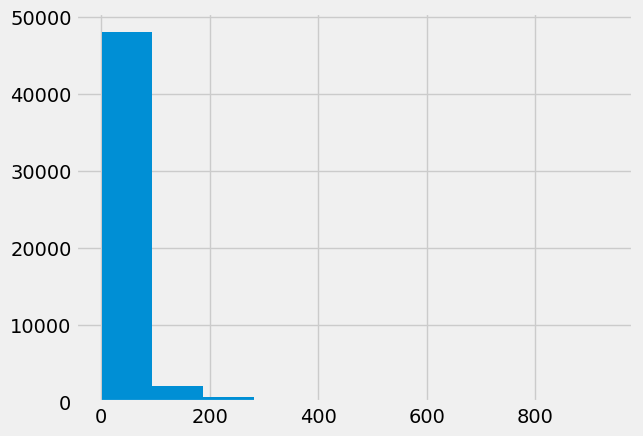

In [20]:
# traçando o histograma
num['Shipping Cost'].hist()

#### Vamos analisar as variáveis categóricas

In [21]:
# resumo das variáveis categóricas
cat.describe()

,Ship Mode,Segment,City,State,Country,Region,Market,Product Name,Sub-Category,Category
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,3650,1106,165,23,5,3788,17,3
top,Standard Class,Consumer,New York City,California,United States,Western Europe,Asia Pacific,Staples,Binders,Office Supplies
freq,30775,26518,915,2001,9994,5883,14302,227,6146,31289


In [22]:
# Exibindo o numero de registro para cada coluna
for coluna in cat:
    print(f'Total de registros de: {coluna}')
    print(cat[coluna].value_counts())
    print()

Total de registros de: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Total de registros de: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Total de registros de: City
City
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Ludwigsfelde        1
Vacaville           1
Forst               1
Schweinfurt         1
Victoria Falls      1
Name: count, Length: 3650, dtype: int64

Total de registros de: State
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Ardahan                  1
Okayama                  1
Tottori                  1
Marsabit                 1
Matabeleland North       1
Name: count, Length: 1106, dtype: int64

Total de registr

### Análise Univariada - Box Plots

In [23]:
nomes_nums = num.columns
nomes_nums

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

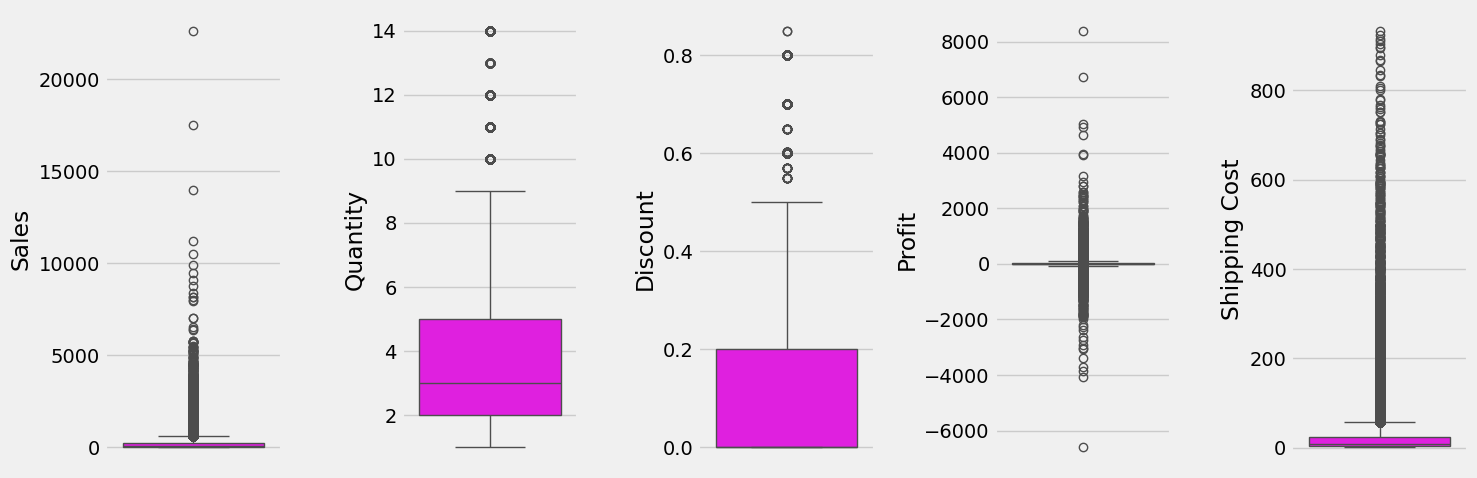

In [24]:
features = nomes_nums

plt.figure(figsize=(15, 5))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df_superstore[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()
    
plt.show()

### Análise Univariada - Dist Plots

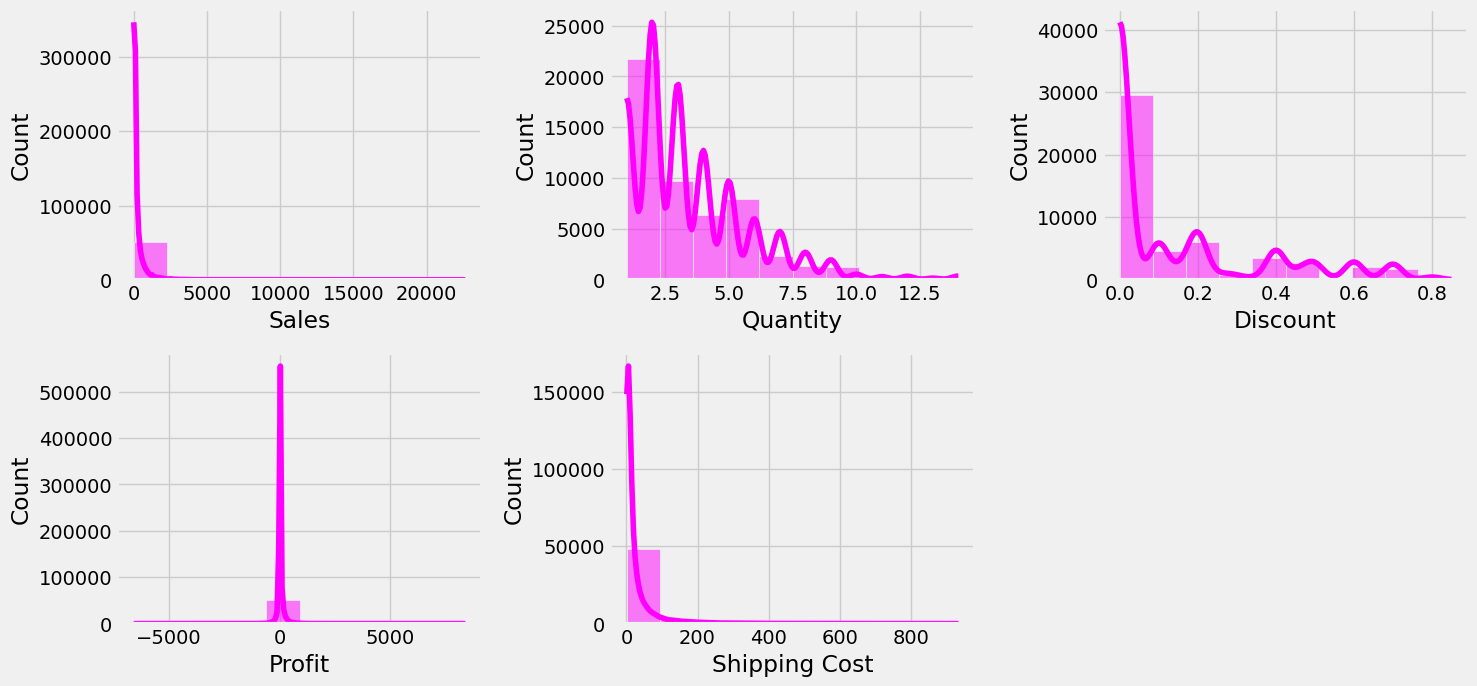

In [25]:
features = nomes_nums

plt.figure(figsize=(15, 10))

for i in range(0, len(features)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x = df_superstore[features[i]], kde=True, bins=10, color = 'magenta')
    plt.xlabel(features[i])
    plt.tight_layout()
    
plt.show()

### Análise Univariada - Violin Plots

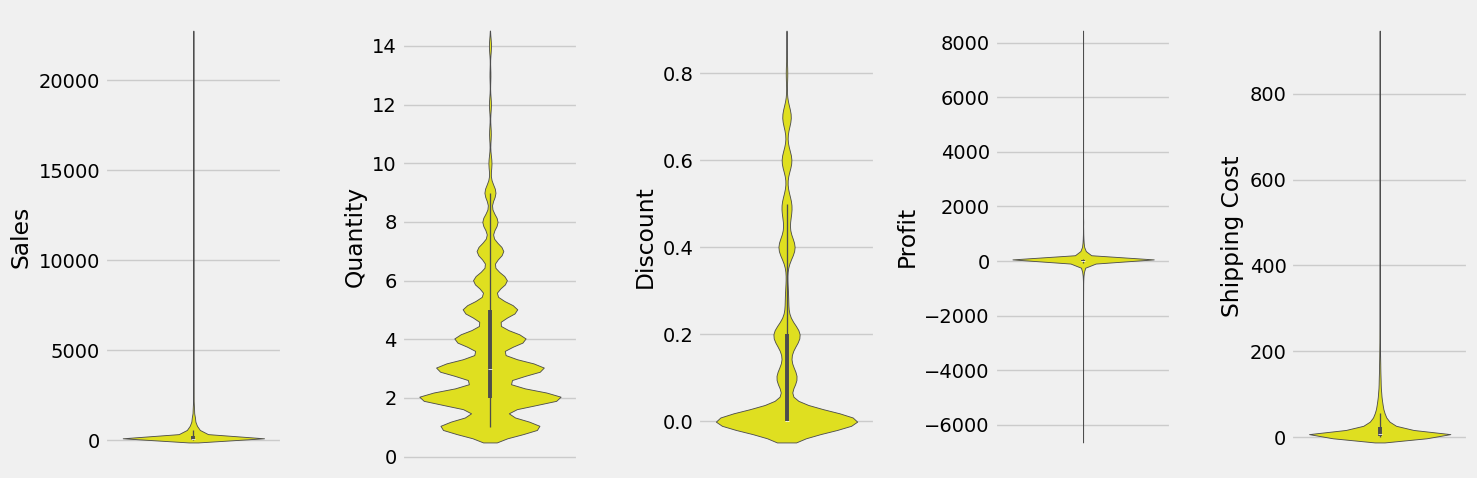

In [26]:
plt.figure(figsize=(15, 5))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.violinplot(y = df_superstore[features[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()
    
plt.show()

### Análise Univariada - Count Plots (categoricas)

In [27]:
nomes_cats = cat.columns
nomes_cats

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Region', 'Market',
       'Product Name', 'Sub-Category', 'Category'],
      dtype='object')

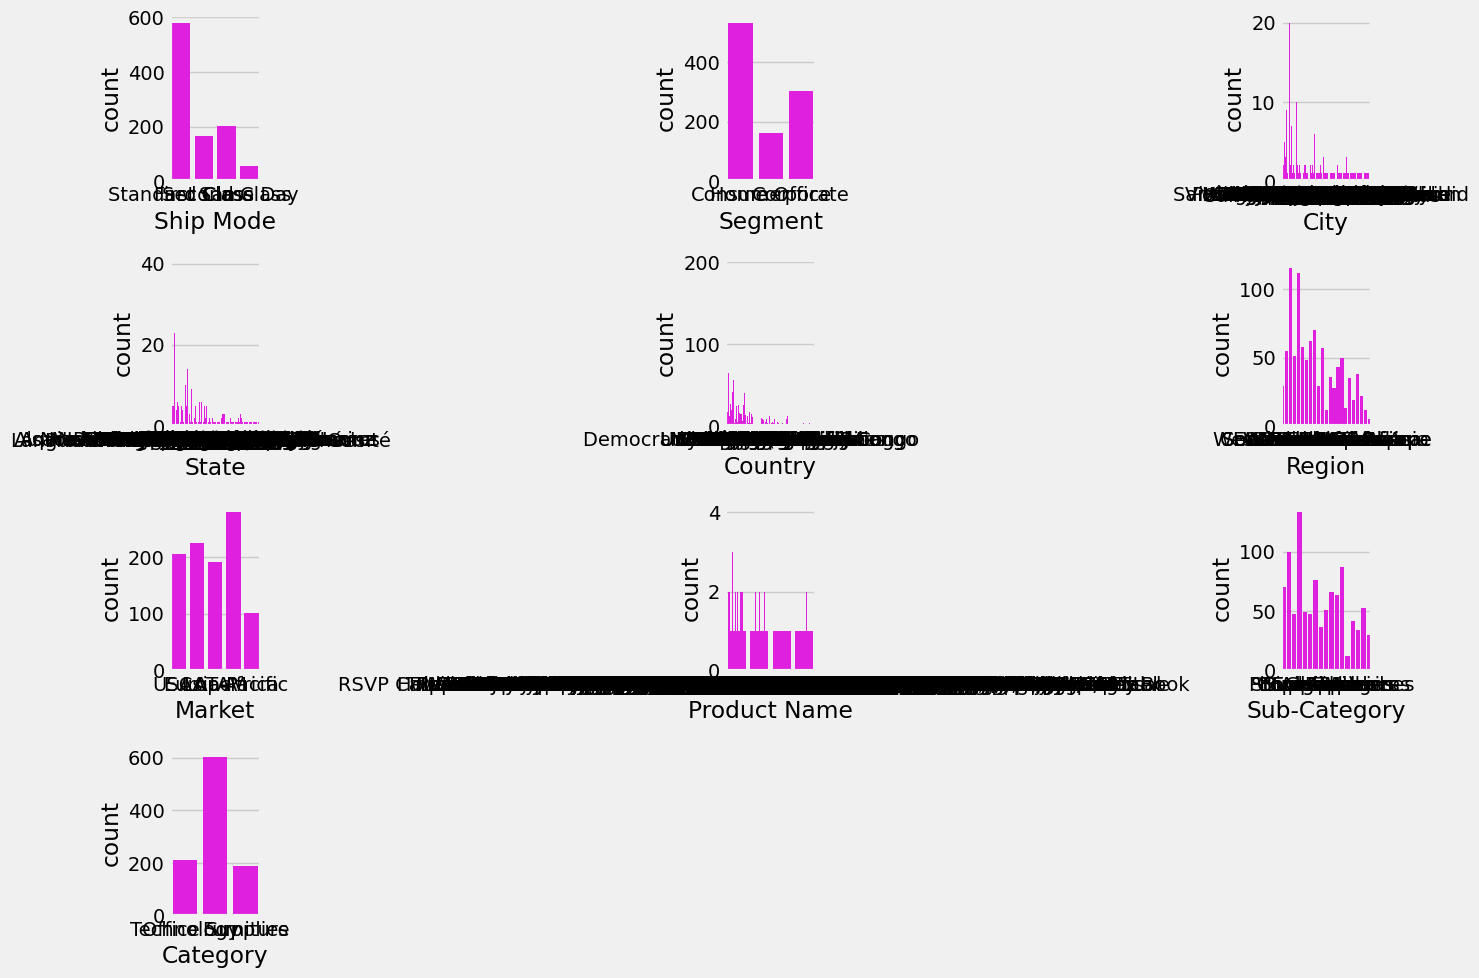

In [28]:
features_cat = nomes_cats

df_sample = df_superstore.sample(1000, random_state=42)

plt.figure(figsize=(15, 10))

for i in range(0, len(nomes_cats)):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x = df_sample[features_cat[i]], color = 'magenta', orient='v')
    plt.tight_layout()
    
plt.show()

### Análise Bivariada - Mapa de Correlação

In [31]:
num.corr()

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.078153
Profit,0.484918,0.104365,-0.316490,1.000000,0.354423
Shipping Cost,0.767835,0.271804,-0.078153,0.354423,1.000000


In [32]:
corr_df = num.corr()

<Axes: >

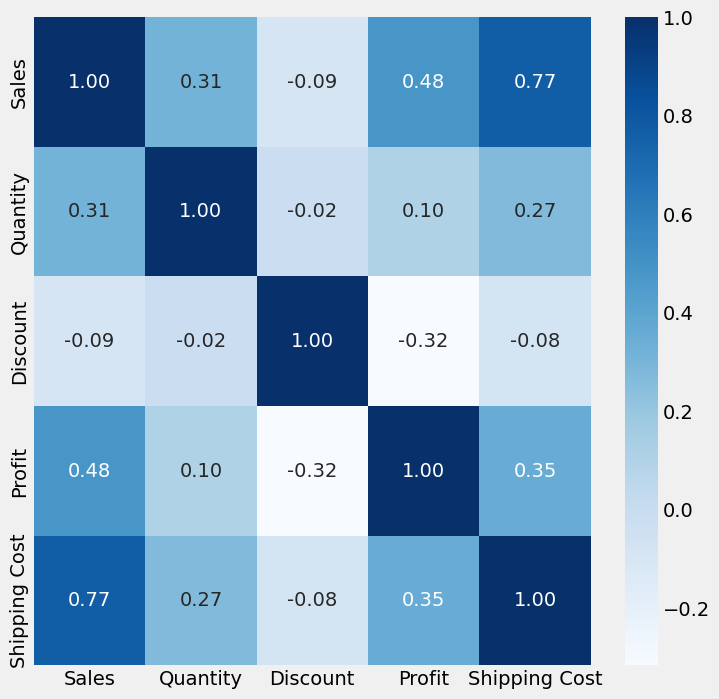

In [37]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

### Análise Bivariada - Pair plot

<Figure size 1000x1000 with 0 Axes>

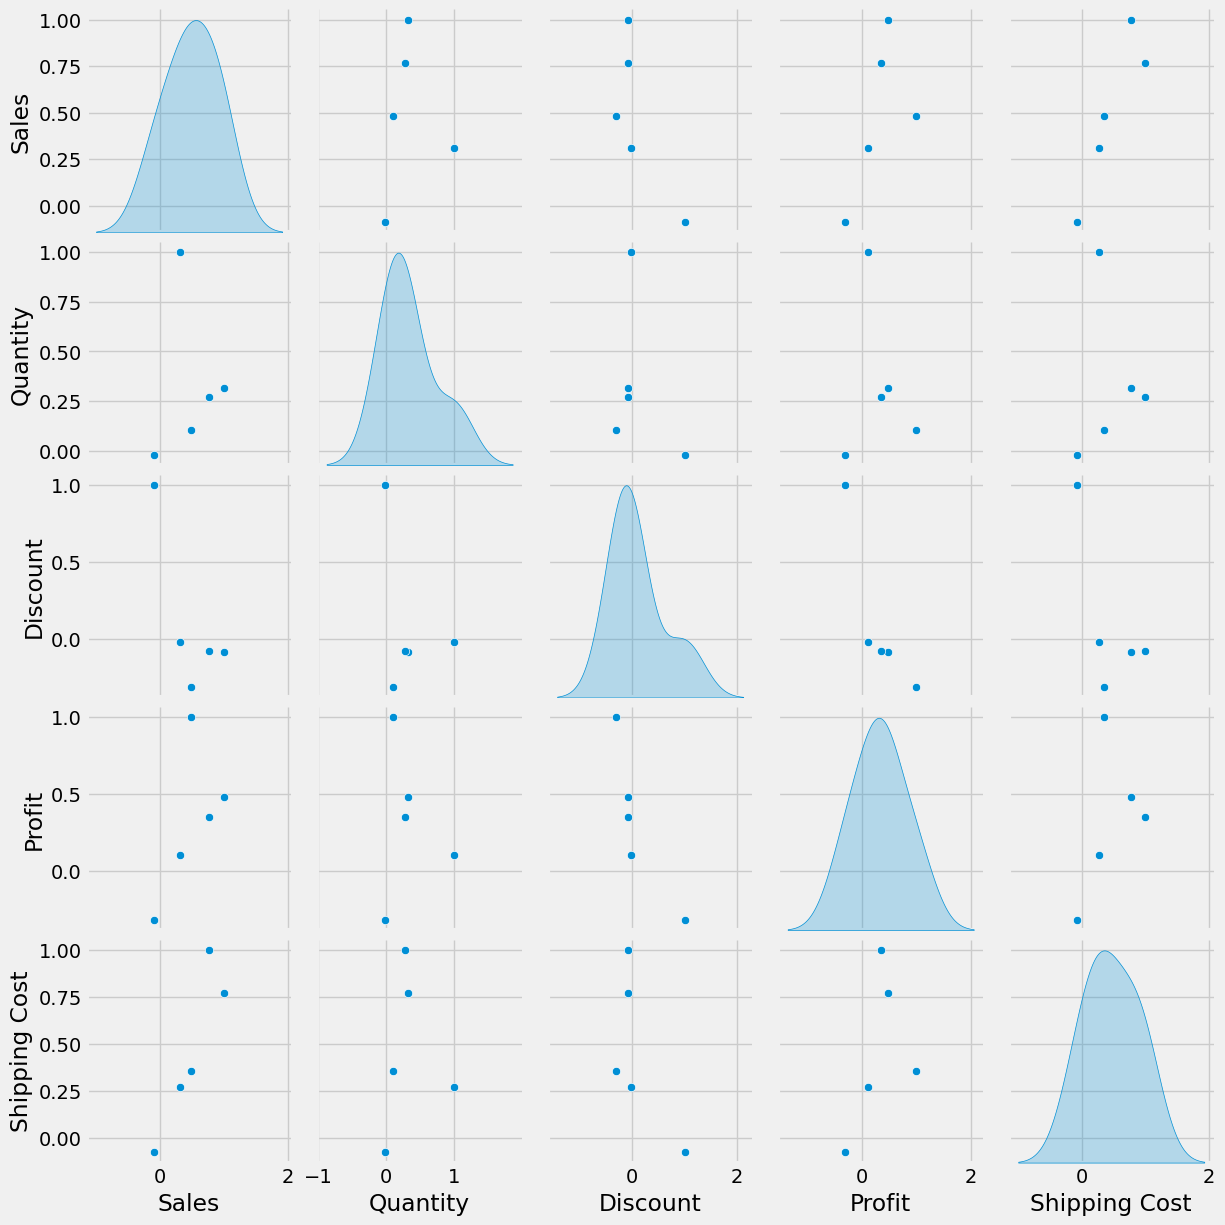

In [39]:
plt.figure(figsize = (10, 10))
sns.pairplot(corr_df, diag_kind='kde')

#### Colunas categóricas x variavel Sales

In [42]:
df_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

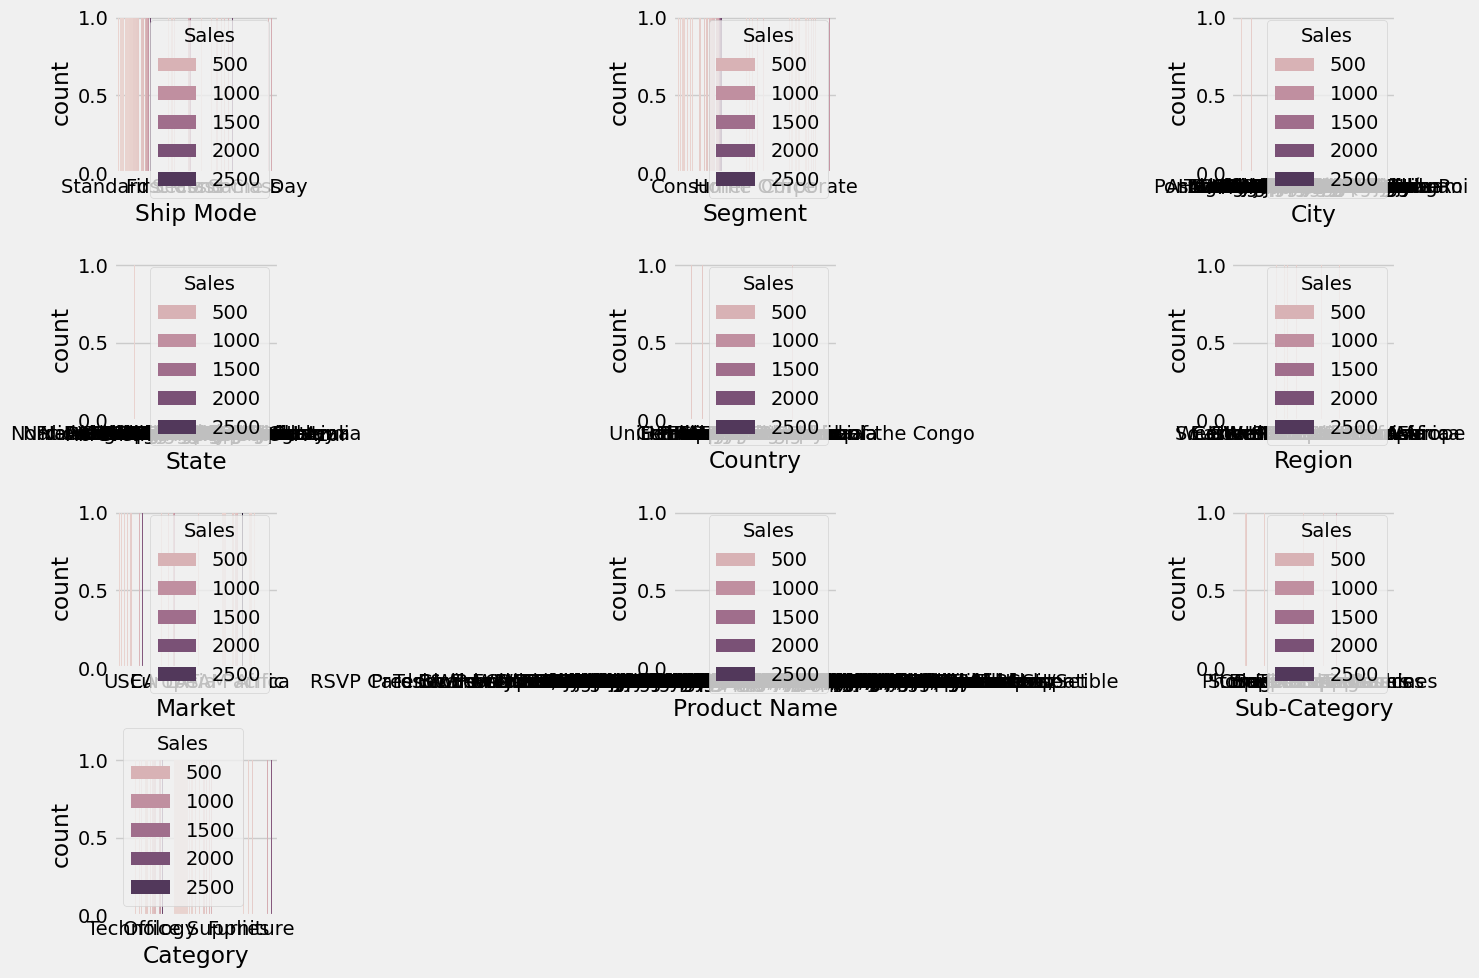

In [50]:
features_cat = nomes_cats

df_sample = df_superstore.sample(100, random_state=42)

plt.figure(figsize=(15, 10))

for i in range(0, len(features_cat)):
    plt.subplot(5, 2, i + 1)
    sns.countplot(data = df_sample, x = features_cat[i], hue = 'Sales')
    plt.tight_layout()
    
plt.show()